In [1]:
# Import necessary libraries and modules
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from catboost import CatBoostClassifier
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn import tree, metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, accuracy_score, mean_absolute_error, mean_squared_error
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
import csv

C:\Users\phili\Anaconda3\lib\site-packages\dask\config.py:131: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}


In [2]:
# Read the vcs file into dataframe
plays_df = pd.read_csv('C:\\Users\\phili\\Downloads\\Capstone\\plays_df_cleaned.csv')

In [3]:
# change the category types of offenseFormation and epa
plays_df['offenseFormation'] = plays_df['offenseFormation'].astype('category')
plays_df['epa'] = plays_df['epa'].astype('int')

In [4]:
# Create a list of features to use for linear regression model
features = ['defendersInTheBox', 'numberOfPassRushers','offensePlayResult','epa']
features_df = plays_df[features]

In [5]:
# epa will be the target variable 
y = features_df['epa'].values
X = features_df.drop(['epa'], axis= 1)

In [6]:
# create train test split for the model evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=123)

In [7]:
# One-hot encode all features in training set.
X_train = pd.get_dummies(X_train)

#  One-hot encode for test set
X_test = pd.get_dummies(X_test)

In [8]:
# scale data, apply to training set, then finally to test set
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [9]:
# Create the classifier
lin_clf = LinearRegression()

# Fit the classifier to the training data
lin_clf.fit(X_train_scaled, y_train)

# Predict the labels of the test set: y_pred
y_pred = lin_clf.predict(X_test_scaled)

# Compute and print the MAE, MSE, RMSE
print(metrics.mean_absolute_error(y_test, y_pred))
print(metrics.mean_squared_error(y_test, y_pred))
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
#print(metrics.f1_score(y_test, y_pred))
# Compute 5-fold cross-validation scores: cv_scores
#cv_scores = cross_val_score(lin_clf, X, y, cv = 5)

# Print the 5-fold cross-validation scores
#print(cv_scores)

0.603012166085513
0.9522452746136398
0.9758305563024965


In [13]:
# Create a gini model to test my features
gini_model = DecisionTreeClassifier(criterion="gini", random_state = 1234, max_depth = 3) 

#  fit the model
gini_model.fit(X_train, y_train)

# predict y 
y_pred = gini_model.predict(X_test) 

# Check out gini_model
gini_model

DecisionTreeClassifier(max_depth=3, random_state=1234)

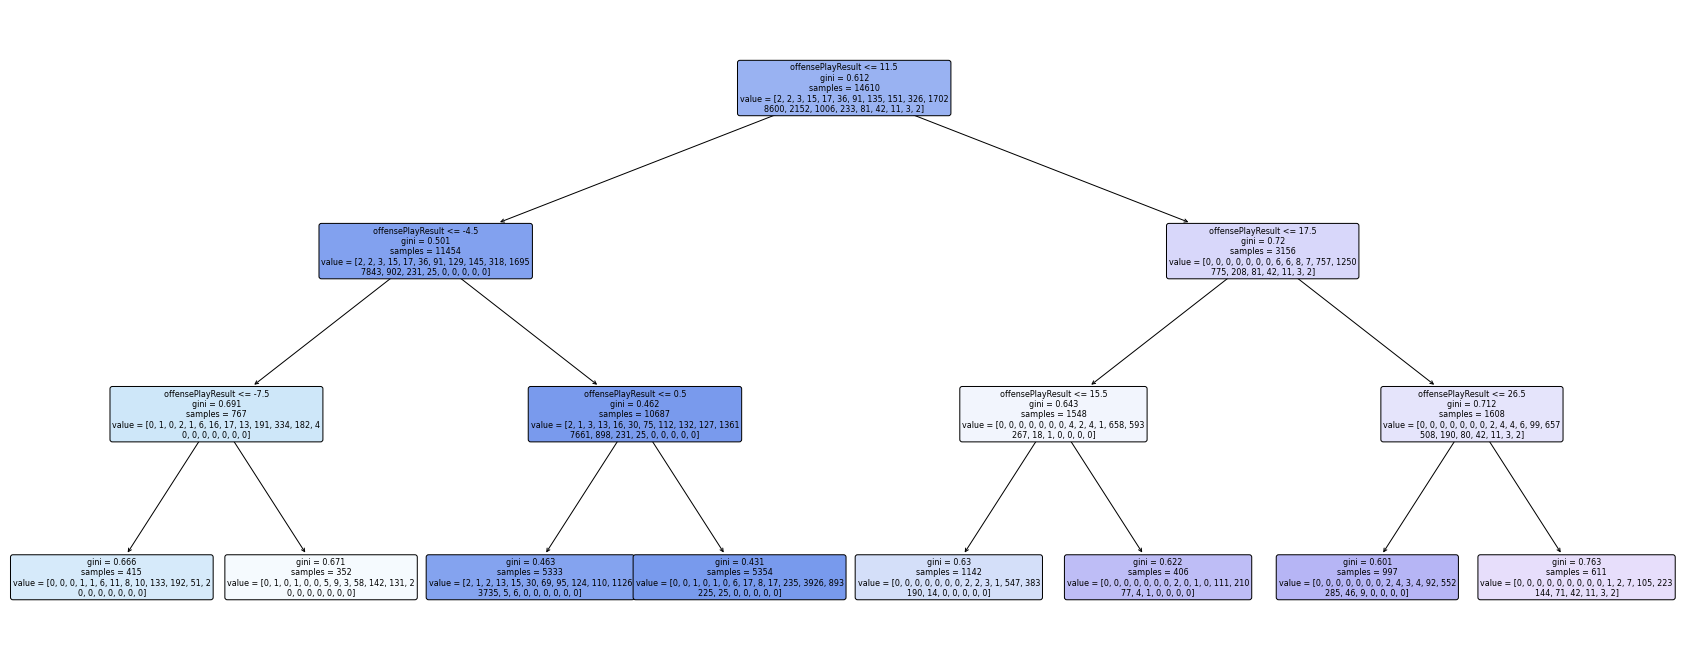

In [14]:
# Plot the decision tree created from the gini model
plt.figure(figsize=(30,12))  # set plot size (denoted in inches) class_names = ["No", "Yes"]
tree.plot_tree(gini_model, rounded= True, filled= True, feature_names=X_train.columns, max_depth = 3, fontsize =8)
plt.show()

In [15]:
'''# Create the training and test sets
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=123)

# Instantiate the XGBClassifier: xg_cl
xg_cl = xgb.XGBClassifier(objective='binary:logistic', n_estimators= 10, seed=123, enable_categorical= True,
                         use_label_encoder=False)

# Fit the classifier to the training set
xg_cl.fit(X_train, y_train)

# Predict the labels of the test set: preds
preds = xg_cl.predict(X_test)'''

# add offenseFormation to list of features
features = ['offenseFormation','defendersInTheBox', 'numberOfPassRushers','offensePlayResult','epa']

# create the dataframe with the new list of features
features_df = plays_df[features]

# Create the y and x variables
y = features_df['epa'].values 
X = features_df.drop(['epa'], axis= 1)

# create the train test split from the freatures
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=123)

# Identify the offenseFormation as a categorical feature
cat_features= ['offenseFormation']

# Code modified from Catboost Tutorial on Google Colaboratory with free GPU on youTube
#Instantiate the model 
model= CatBoostClassifier(task_type= 'GPU', iterations= 100, random_state= 1234, eval_metric= 'F1')

# fit the model
model.fit(X_train, y_train, cat_features= cat_features, plot= True, eval_set=(X_test, y_test))

# predict y 
y_pred= model.predict(X_test)

# compute the f1_score and accuracy score
f1_score(y_test, y_pred)
accurracy_score(y_test, y_pred)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.377104


CatBoostError: c:/program files (x86)/go agent/pipelines/buildmaster/catboost.git/catboost/cuda/cuda_lib/cuda_base.h:281: CUDA error 35: CUDA driver version is insufficient for CUDA runtime version